In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [47]:
data = pd.read_excel("задание4.xlsx")
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
data

,target,age,educ,work_exp,interest,...,offhour,dist,salary,heigh,lunch
0,0,50,4,27,8,...,0,10.6,1,176,226
1,0,30,3,10,0,...,0,11.5,0,186,226
2,0,43,3,22,7,...,0,12.8,1,166,238
3,0,58,3,31,7,...,0,15.2,1,180,216
4,1,40,3,23,7,...,0,16.1,1,180,286
...,...,...,...,...,...,...,...,...,...,...,...
979,0,32,1,8,3,...,1,10.1,1,169,227
980,0,52,3,34,6,...,0,10.4,0,184,299
981,0,57,3,35,9,...,0,9.8,0,167,299
982,0,32,2,10,7,...,1,12.6,1,182,295


In [48]:
features = ['age', 'educ', 'work_exp', 'interest', 'coffee', 'boss_educ', 'passport', 'green', 'floor',
            'children', 'climate', 'offhour', 'dist', 'salary', 'heigh']
target = 'target' 

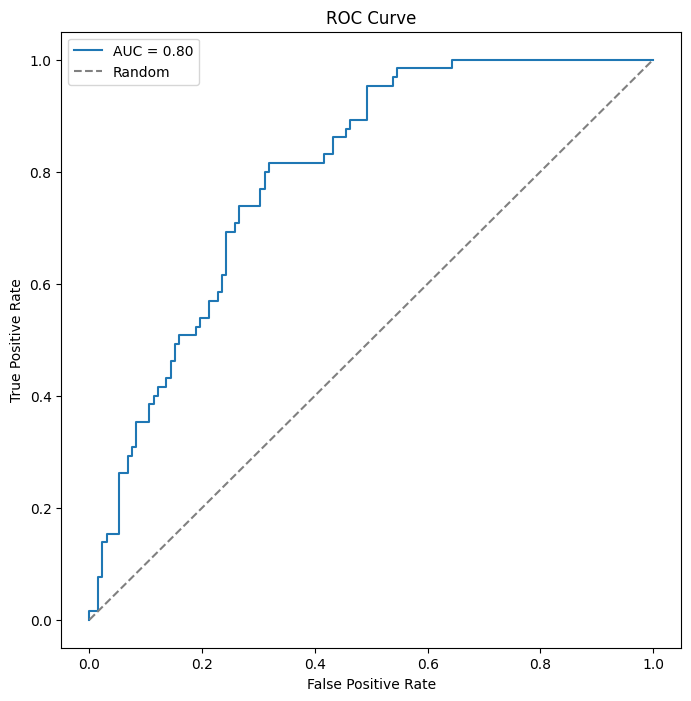

Confusion Matrix:
 [[108  24]
 [ 32  33]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79       132
           1       0.58      0.51      0.54        65

    accuracy                           0.72       197
   macro avg       0.68      0.66      0.67       197
weighted avg       0.71      0.72      0.71       197


AUC-ROC: 0.80


In [49]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)


plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)
print(f"\nAUC-ROC: {roc_auc:.2f}")

<Axes: >

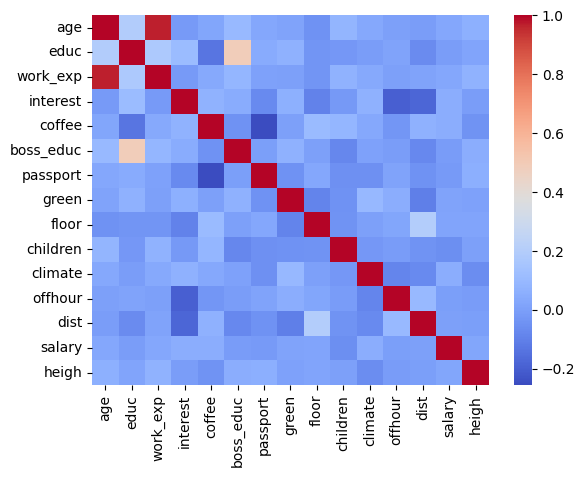

In [50]:
sns.heatmap(data[features].corr(), cmap='coolwarm')

### На мой взгляд некоторые переменные не являются релевантными по отношению к нашему исследованию. Например такие показатели как cofee, floor, height, passport никаким образом не отражают человека с точки зрения желания/нежелания уволиться, поэтому на мой взгляд эти признаки следует исключить. Также показатели age и work_exp, очень сильно коррелируют между собой, поэтому правильнее будет оставить лишь одну один из них.

In [51]:
new_features = ['educ', 'work_exp', 'interest', 'boss_educ','green','children', 'climate', 'offhour', 'dist', 'salary']
target = 'target' 

In [52]:
for feature in features:
    if feature in new_features:
        print(f"True - {feature}")
    else:
        print(f"False - {feature}")

False - age
True - educ
True - work_exp
True - interest
False - coffee
True - boss_educ
False - passport
True - green
False - floor
True - children
True - climate
True - offhour
True - dist
True - salary
False - heigh


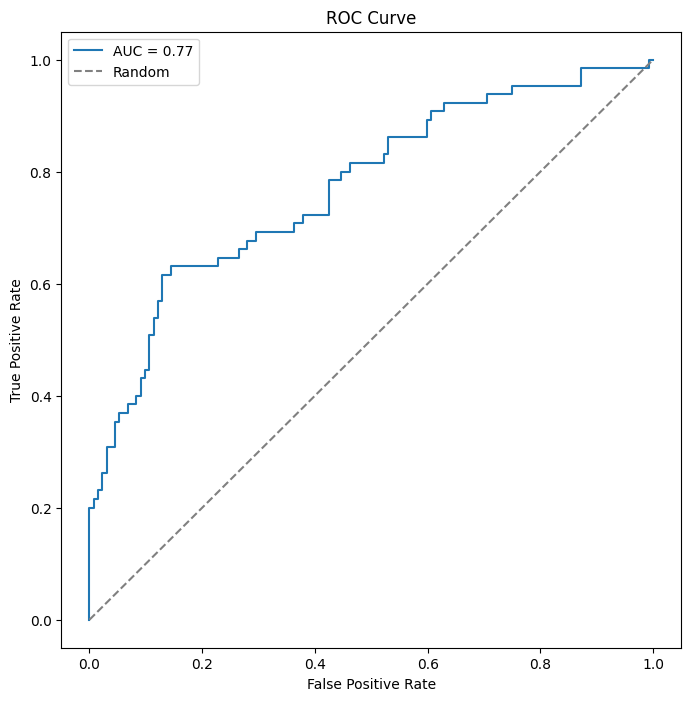

Confusion Matrix:
 [[118  14]
 [ 36  29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.83       132
           1       0.67      0.45      0.54        65

    accuracy                           0.75       197
   macro avg       0.72      0.67      0.68       197
weighted avg       0.74      0.75      0.73       197


AUC-ROC: 0.77


In [53]:
X_train, X_test, y_train, y_test = train_test_split(data[new_features], data[target], test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)


plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)
print(f"\nAUC-ROC: {roc_auc:.2f}")